In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [ ]:
## Get the APPLE stock data
from datetime import date
import datetime
import yfinance as yf
import pandas as pd
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 9, 30)
df = yf.download("AAPL", start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02 00:00:00+00:00,40.568935,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03 00:00:00+00:00,40.561863,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04 00:00:00+00:00,40.750275,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05 00:00:00+00:00,41.214233,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08 00:00:00+00:00,41.061142,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2024-09-23 00:00:00+00:00,226.470001,226.470001,229.449997,225.809998,227.339996,54146000
2024-09-24 00:00:00+00:00,227.369995,227.369995,229.350006,225.729996,228.649994,43556100


In [ ]:
# Describe dataset
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1.696000e+03
mean,118.195930,120.009326,121.235469,118.668187,119.906253,1.022984e+08
std,56.169681,55.763178,56.261790,55.215037,55.729537,5.503669e+07
min,33.989899,35.547501,36.430000,35.500000,35.994999,2.404830e+07
25%,53.465354,55.931251,56.430624,55.131875,55.863126,6.548850e+07
50%,129.703102,132.000000,133.584999,130.380005,132.105003,8.864400e+07
75%,165.810368,167.412495,169.339996,165.980003,167.757496,1.230825e+08
max,234.548523,234.820007,237.229996,233.089996,236.479996,4.265100e+08


In [ ]:
df_reset = df.reset_index()
# Select only the 'Date' and 'Close' columns
df_extracted = df_reset[['Date', 'Close']]
# Display the extracted DataFrame
print(df_extracted.head())

Price                       Date      Close
Ticker                                 AAPL
0      2018-01-02 00:00:00+00:00  43.064999
1      2018-01-03 00:00:00+00:00  43.057499
2      2018-01-04 00:00:00+00:00  43.257500
3      2018-01-05 00:00:00+00:00  43.750000
4      2018-01-08 00:00:00+00:00  43.587502


In [ ]:
df_extracted['Date'] = pd.to_datetime(df_extracted['Date'])
df_extracted.head()
df_extracted.index[df_extracted['Close'] < 0]

<ipython-input-5-d1d4d2a526cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['Date'] = pd.to_datetime(df_extracted['Date'])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
df_extracted.head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_extracted['Date'], df_extracted['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
df_extracted = df_extracted.rename(columns={'Date': 'ds', 'Close': 'y'})
df_extracted.head()

In [ ]:
# Split into training and testing data (70% train, 30% test)
train_data_len = int(0.7 * len(df_extracted))
df_train = df_extracted[:train_data_len]
df_test = df_extracted[train_data_len:]

In [ ]:
m = Prophet(daily_seasonality = True)
m.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_sa8g74p/8509977o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_sa8g74p/81rfuhkk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55316', 'data', 'file=/tmp/tmp_sa8g74p/8509977o.json', 'init=/tmp/tmp_sa8g74p/81rfuhkk.json', 'output', 'file=/tmp/tmp_sa8g74p/prophet_modelh7pjav04/prophet_model-20241022104016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_train.shape

(1187, 2)

In [ ]:
df_test.shape

(509, 2)

In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_sa8g74p/730tmadx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_sa8g74p/vzki1lgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35366', 'data', 'file=/tmp/tmp_sa8g74p/730tmadx.json', 'init=/tmp/tmp_sa8g74p/vzki1lgk.json', 'output', 'file=/tmp/tmp_sa8g74p/prophet_modellth80nll/prophet_model-20241022104020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods= int((df_test.index[-1] - df_train.index[-1])),freq = 'd')
future.tail(14)
future['day'] = future['ds'].dt.weekday
future = future[(future['day']<5)]
future.tail(14)


forecast = model.predict(future)
print(len(future))
print(len(forecast))

1551
1551


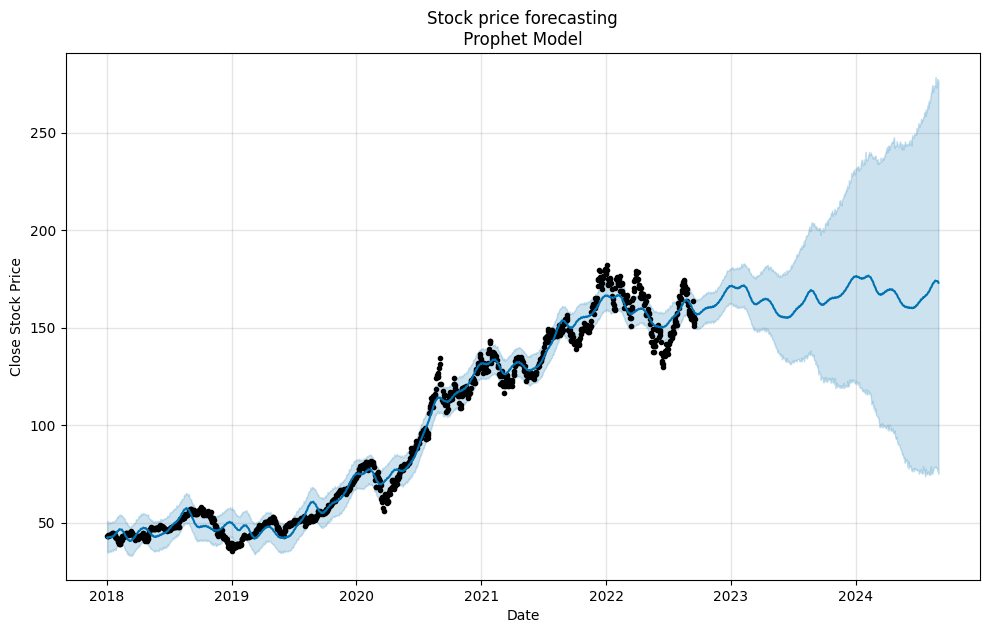

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,40.904926,35.030558,49.574360,40.904926,40.904926,1.362634,1.362634,1.362634,-7.546353,...,-0.288235,-0.288235,-0.288235,9.197222,9.197222,9.197222,0.0,0.0,0.0,42.267560
1,2018-01-03,41.031154,35.283646,50.831242,41.031154,41.031154,1.434666,1.434666,1.434666,-7.546353,...,-0.179780,-0.179780,-0.179780,9.160799,9.160799,9.160799,0.0,0.0,0.0,42.465820
2,2018-01-04,41.157382,34.618572,49.505114,41.157382,41.157382,1.153943,1.153943,1.153943,-7.546353,...,-0.406767,-0.406767,-0.406767,9.107063,9.107063,9.107063,0.0,0.0,0.0,42.311325
3,2018-01-05,41.283610,34.612894,49.210925,41.283610,41.283610,0.928813,0.928813,0.928813,-7.546353,...,-0.562732,-0.562732,-0.562732,9.037898,9.037898,9.037898,0.0,0.0,0.0,42.212423
4,2018-01-08,41.662293,35.124636,50.260306,41.662293,41.662293,0.764861,0.764861,0.764861,-7.546353,...,-0.449065,-0.449065,-0.449065,8.760279,8.760279,8.760279,0.0,0.0,0.0,42.427154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,2024-08-26,178.266186,77.994948,275.879019,81.492156,280.585761,-4.400246,-4.400246,-4.400246,-7.546353,...,-0.449065,-0.449065,-0.449065,3.595172,3.595172,3.595172,0.0,0.0,0.0,173.865940
1692,2024-08-27,178.279706,76.245201,277.527610,81.048562,280.936477,-4.378740,-4.378740,-4.378740,-7.546353,...,-0.288235,-0.288235,-0.288235,3.455848,3.455848,3.455848,0.0,0.0,0.0,173.900966
1693,2024-08-28,178.293227,78.042909,276.514040,80.771472,281.217364,-4.445921,-4.445921,-4.445921,-7.546353,...,-0.179780,-0.179780,-0.179780,3.280212,3.280212,3.280212,0.0,0.0,0.0,173.847306
1694,2024-08-29,178.306747,75.247213,277.289281,80.653713,281.580271,-4.882940,-4.882940,-4.882940,-7.546353,...,-0.406767,-0.406767,-0.406767,3.070180,3.070180,3.070180,0.0,0.0,0.0,173.423807


In [ ]:
future = m.make_future_dataframe(periods=509,freq='B')
prediction = m.predict(future)
m.plot(prediction)
plt.title("Stock price forecasting\n Prophet Model ")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
prediction



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
y_test = df_test['y'].values
y_pred = prediction['yhat'].values

mse = mean_squared_error(df['Close'], prediction['yhat'].values)
rmse = math.sqrt(mse)
mae = mean_absolute_error(df['Close'], prediction['yhat'].values)
mape = mean_absolute_percentage_error(df['Close'], prediction['yhat'].values)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 264.9178045828119
RMSE: 16.27629578813349
MAE: 9.857712462332898
MAPE: 0.07657909915504295
